In [1]:
from datetime import datetime, timedelta
import time
import numpy as np
import pandas as pd
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator
import matplotlib
plt.style.use('seaborn-white')
matplotlib.rcParams['axes.labelsize'] = 16
matplotlib.rcParams['xtick.labelsize'] = 14
matplotlib.rcParams['ytick.labelsize'] = 14
matplotlib.rcParams['text.color'] = 'k'

In [2]:
#df = pd.read_csv("RU3.txt", sep=" ")
df2= pd.read_csv("weeklydata.txt", sep=" ")

In [9]:
df2 = df2[df2['Line'] > 53]
#weekly standardized abundance
#sample = df[::7]
#Atnm=preprocessing.scale(sample['At'])
#dates=df2['Group.2']
Atnm=df2['abnm']
error=np.std(Atnm)
#weekly epi data
#df2 = df2[df2['Line'] > 942]
epi=df2['e']
error3=np.std(epi)
#dates=dates[dates>= 2001]


#daily
#Atnm2=preprocessing.scale(df['At'])
#error2=np.std(Atnm2)
#Atnmd = pd.DataFrame({'date':df['Date2'], 'data':Atnm2})
#Atnmd.date = pd.to_datetime(Atnmd.date)
#Atnmd[(Atnmd.date < '2018-03-25') & (Atnmd.date > '2017-12-01')];
#Atnmd.date=Atnmd.date[(Atnmd.date < '2018-03-25') & (Atnmd.date > '2017-12-01')];

In [12]:
dat=np.arange(2001,2018.24,1/53)
def convert_partial_year(number):
    year = int(number)
    d = timedelta(days=(number - year)*365)
    day_one = datetime(year,1,1)
    date = d + day_one
    return date
datesv=np.vectorize(convert_partial_year)
dates=datesv(dat)

In [40]:
from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('Figure_LaReunion.pdf') as pdf:

    #dates = pd.date_range(start='2001-01-01',end='2018-04-01',freq='W')
    #dates2= dates[dates> '2017-09-30']
    
    plt.rcParams["figure.figsize"] = (20,10)

    ax1 = plt.axes()  # main axes
    ax1.plot(dates, Atnm,label = 'Standardized abundance');
    ax1.fill_between(dates, Atnm-error, Atnm+error,
    alpha=0.6, edgecolor = 'k')
    plt.xlabel('Date'); plt.ylabel('Standardized abundance ($\sigma$)',color='cornflowerblue')
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax1.xaxis.set_tick_params(reset=True)
    ax1.xaxis.set_major_locator(mdates.YearLocator(1))
    ax1.xaxis.set_minor_locator(mdates.MonthLocator())
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.ylim((-3,5.5))
    plt.xlim(('2001-01-01','2019-01-01'))
    plt.axhline(0, color='black')
    #ax1.xaxis.grid(True, 'major')
    ax1.tick_params(axis='x',which='minor',bottom=True)
    ax1.yaxis.grid(True, 'major')
    ax1.xaxis.grid(True, 'major')

    ax2 = plt.axes([0.666, 0.727, 0.2, 0.14]) # subplot axes
    ax2.plot(dates, Atnm,label = 'Standardized abundance');
    ax2.fill_between(dates, Atnm-error, Atnm+error,
    alpha=0.6, edgecolor = 'k')
    ax2.tick_params(axis='y',which='minor',left=True)
    ax2.xaxis.set_major_formatter(mdates.DateFormatter("%d %b '%y"))
    plt.xlim(('2017-12-01','2018-03-25'))
    ax2.set_ylim(-2,3.5)
    plt.yticks(np.arange(-2, 3.1, 1.0))
    plt.ylabel('Std. ab. ($\sigma$)',color='cornflowerblue')
    plt.xticks(rotation=90)
    ax2.yaxis.grid(True, 'major')

    ax3 = ax2.twinx()
    ax3.plot(dates, epi,label = 'Epi data',color='red');
    ax3.fill_between(dates, epi-error3, epi+error3,
    alpha=0.6, facecolor='red',edgecolor = 'k')
    ax3.set_ylim(0,160)
    plt.yticks(np.arange(0, 160, 50.0))
    ax3.xaxis.set_major_formatter(mdates.DateFormatter("%d %b '%y"))
    plt.ylabel('Epi-data',color='red')

    pdf.savefig()  # saves the current figure into a pdf page
    plt.close()

Text(0,0.5,'Epi-data')

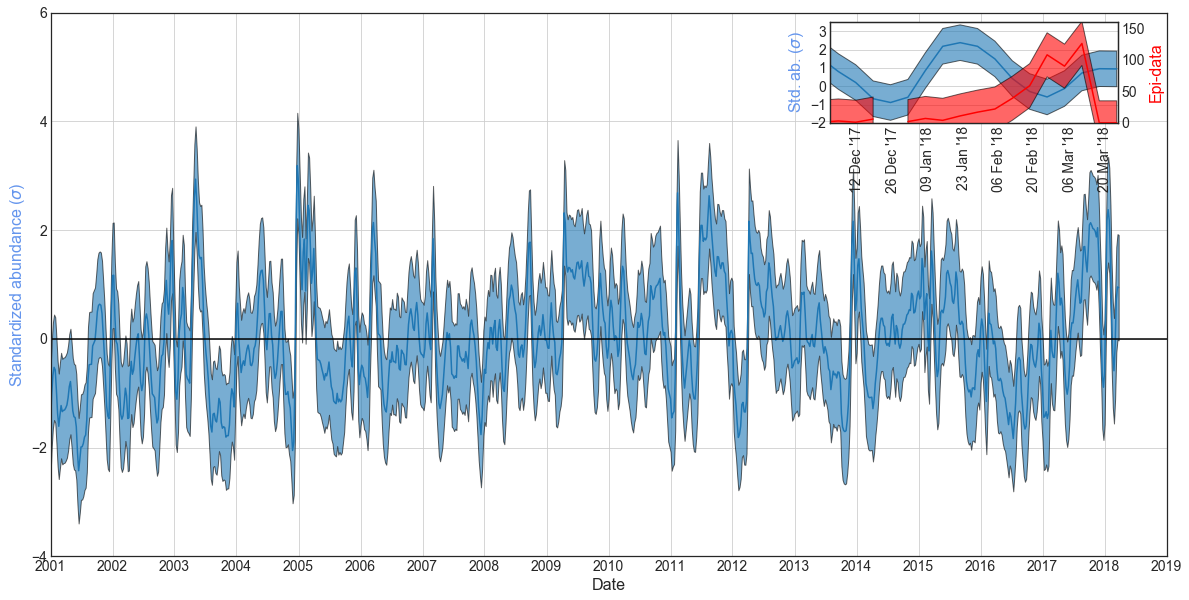

In [39]:
plt.rcParams["figure.figsize"] = (20,10)

ax1 = plt.axes()  # main axes
ax1.plot(dates, Atnm,label = 'Standardized abundance');
ax1.fill_between(dates, Atnm-error, Atnm+error,
alpha=0.6, edgecolor = 'k')
plt.xlabel('Date'); plt.ylabel('Standardized abundance ($\sigma$)',color='cornflowerblue')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.xaxis.set_tick_params(reset=True)
ax1.xaxis.set_major_locator(mdates.YearLocator(1))
ax1.xaxis.set_minor_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.ylim((-4,6))
plt.xlim(('2001-01-01','2019-01-01'))
plt.axhline(0, color='black')
#ax1.xaxis.grid(True, 'major')
ax1.tick_params(axis='x',which='minor',bottom=True)
ax1.yaxis.grid(True, 'major')
ax1.xaxis.grid(True, 'major')

ax2 = plt.axes([0.666, 0.727, 0.2, 0.14]) # subplot axes
ax2.plot(dates, Atnm,label = 'Standardized abundance');
ax2.fill_between(dates, Atnm-error, Atnm+error,
alpha=0.6, edgecolor = 'k')
ax2.tick_params(axis='y',which='minor',left=True)
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%d %b '%y"))
plt.xlim(('2017-12-01','2018-03-25'))
ax2.set_ylim(-2,3.5)
plt.yticks(np.arange(-2, 3.1, 1.0))
plt.ylabel('Std. ab. ($\sigma$)',color='cornflowerblue')
plt.xticks(rotation=90)
ax2.yaxis.grid(True, 'major')

ax3 = ax2.twinx()
ax3.plot(dates, epi,label = 'Epi data',color='red');
ax3.fill_between(dates, epi-error3, epi+error3,
alpha=0.6, facecolor='red',edgecolor = 'k')
ax3.set_ylim(0,160)
plt.yticks(np.arange(0, 160, 50.0))
ax3.xaxis.set_major_formatter(mdates.DateFormatter("%d %b '%y"))
plt.ylabel('Epi-data',color='red')